In [1]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_digits

from findkit.index import AnnoyIndex
from findkit.feature_extractor import SklearnFeatureExtractor

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Data loading and plotting utils

In [2]:
def plot_image(image_data):
    plt.figure(figsize=(2,2))
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')
    plt.show()
    
    
def load_mnist_images():
    _, (images, labels) = mnist.load_data()
    return images, labels
    data = images.reshape(images.shape[0], -1)
    
    
def images_to_vectors(images):
    return images.reshape(images.shape[0], -1)

In [3]:
images, labels = load_mnist_images()

data = images_to_vectors(images)

### Transformer setup

In [4]:
%%time

transformer = NMF(n_components=10)
reduced_data = transformer.fit_transform(data)

CPU times: user 12.7 s, sys: 186 ms, total: 12.9 s
Wall time: 6.56 s


### Setup feature extractor from transformer

In [5]:
feature_extractor = SklearnFeatureExtractor(transformer)

### Setup index

In [6]:
index = AnnoyIndex(reduced_data, n_trees=10, metric='euclidean')

### Nearest neighbor query

In [7]:
query_example_index = 0
query_example = reduced_data[query_example_index]
n_neighbors = 10

In [8]:
neighbor_indices, neighbor_distances = index.find_similar(query_example, n_neighbors+1)

Queried example


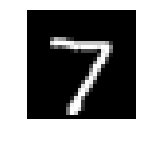

0th closest image
distance from query image: 0.524


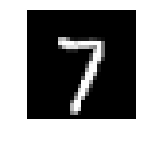

1th closest image
distance from query image: 0.594


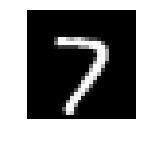

2th closest image
distance from query image: 0.625


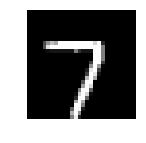

3th closest image
distance from query image: 0.642


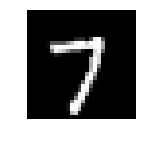

4th closest image
distance from query image: 0.666


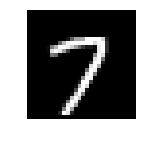

5th closest image
distance from query image: 0.724


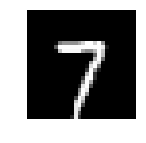

6th closest image
distance from query image: 0.739


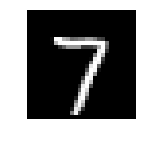

7th closest image
distance from query image: 0.813


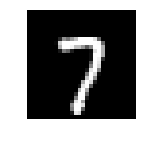

8th closest image
distance from query image: 0.843


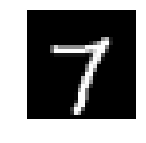

9th closest image
distance from query image: 0.892


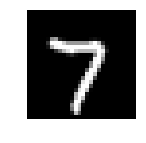

In [9]:
print('Queried example')
plot_image(images[query_example_index])

# drop first example (it is the same as query example)
truncated_results = zip(neighbor_indices[1:], neighbor_distances[1:])

for i, (neighbor_index, distance) in enumerate(truncated_results):
    print('{}th closest image'.format(i))
    print('distance from query image: {:.3f}'.format(distance))
    plot_image(images[neighbor_index])